# Google Cloud and Working on a Server

## Setting up a Google Cloud account

* ### Go to [cloud.google.com](https://cloud.google.com)

* ### Click on "Try it Free"
<div style="display:block;margin:auto;width:800px;">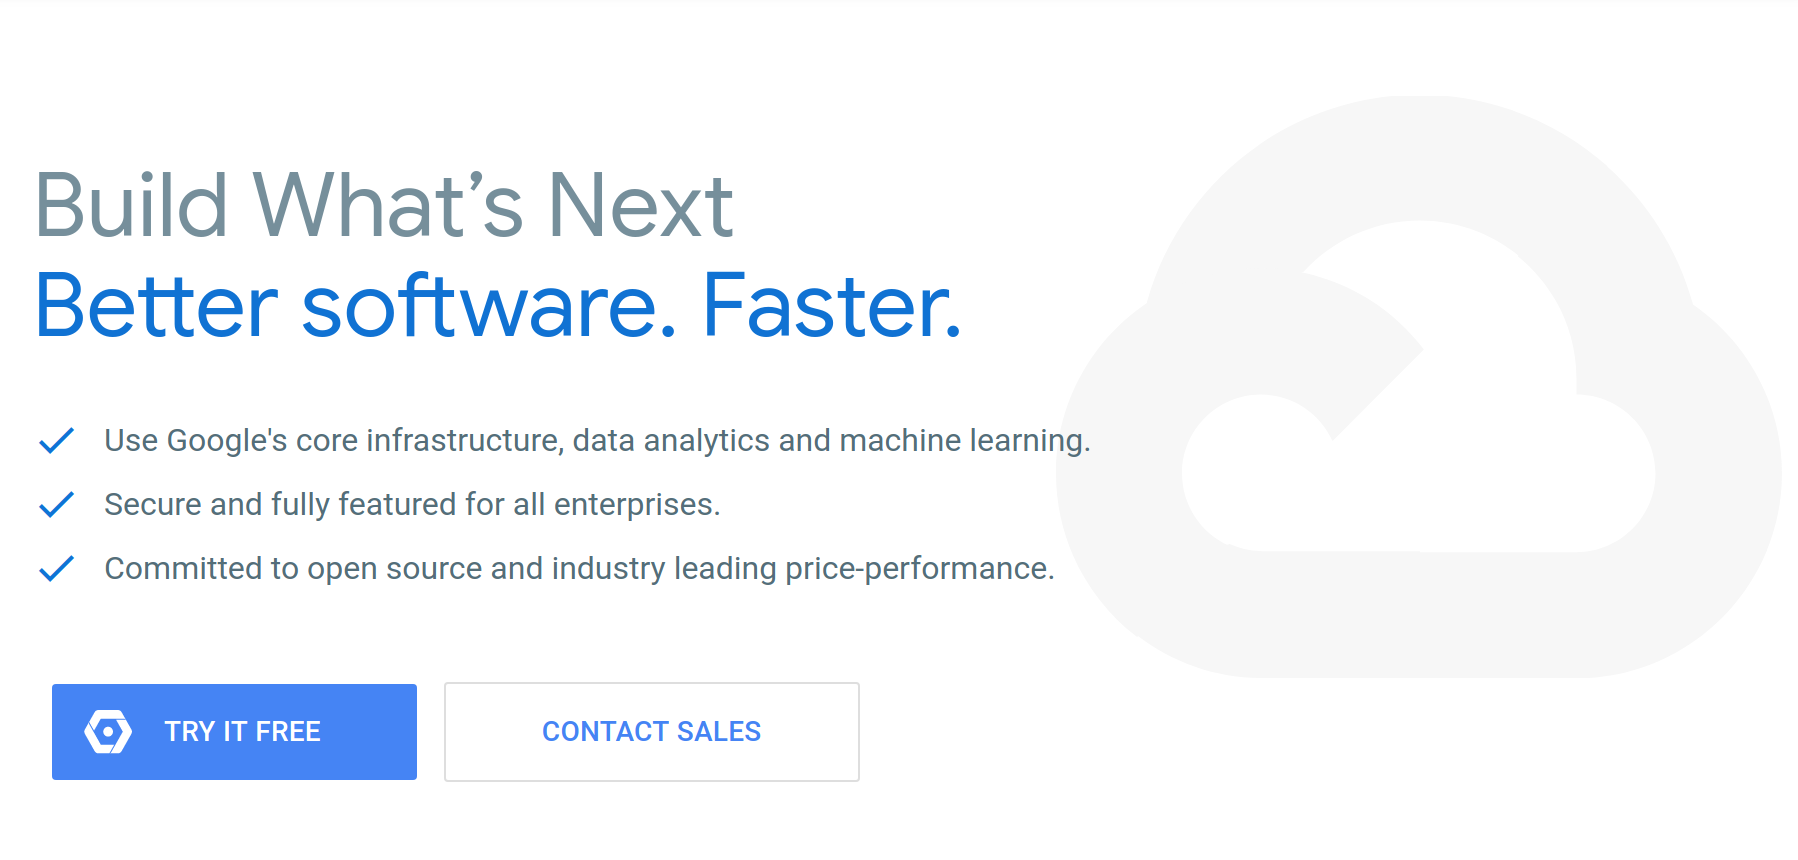</div>
<div style="text-align:center;">**Click on "try it free"**</div>


* ### Accept the terms and conditions

<div style="display:block;margin:auto;width:800px;">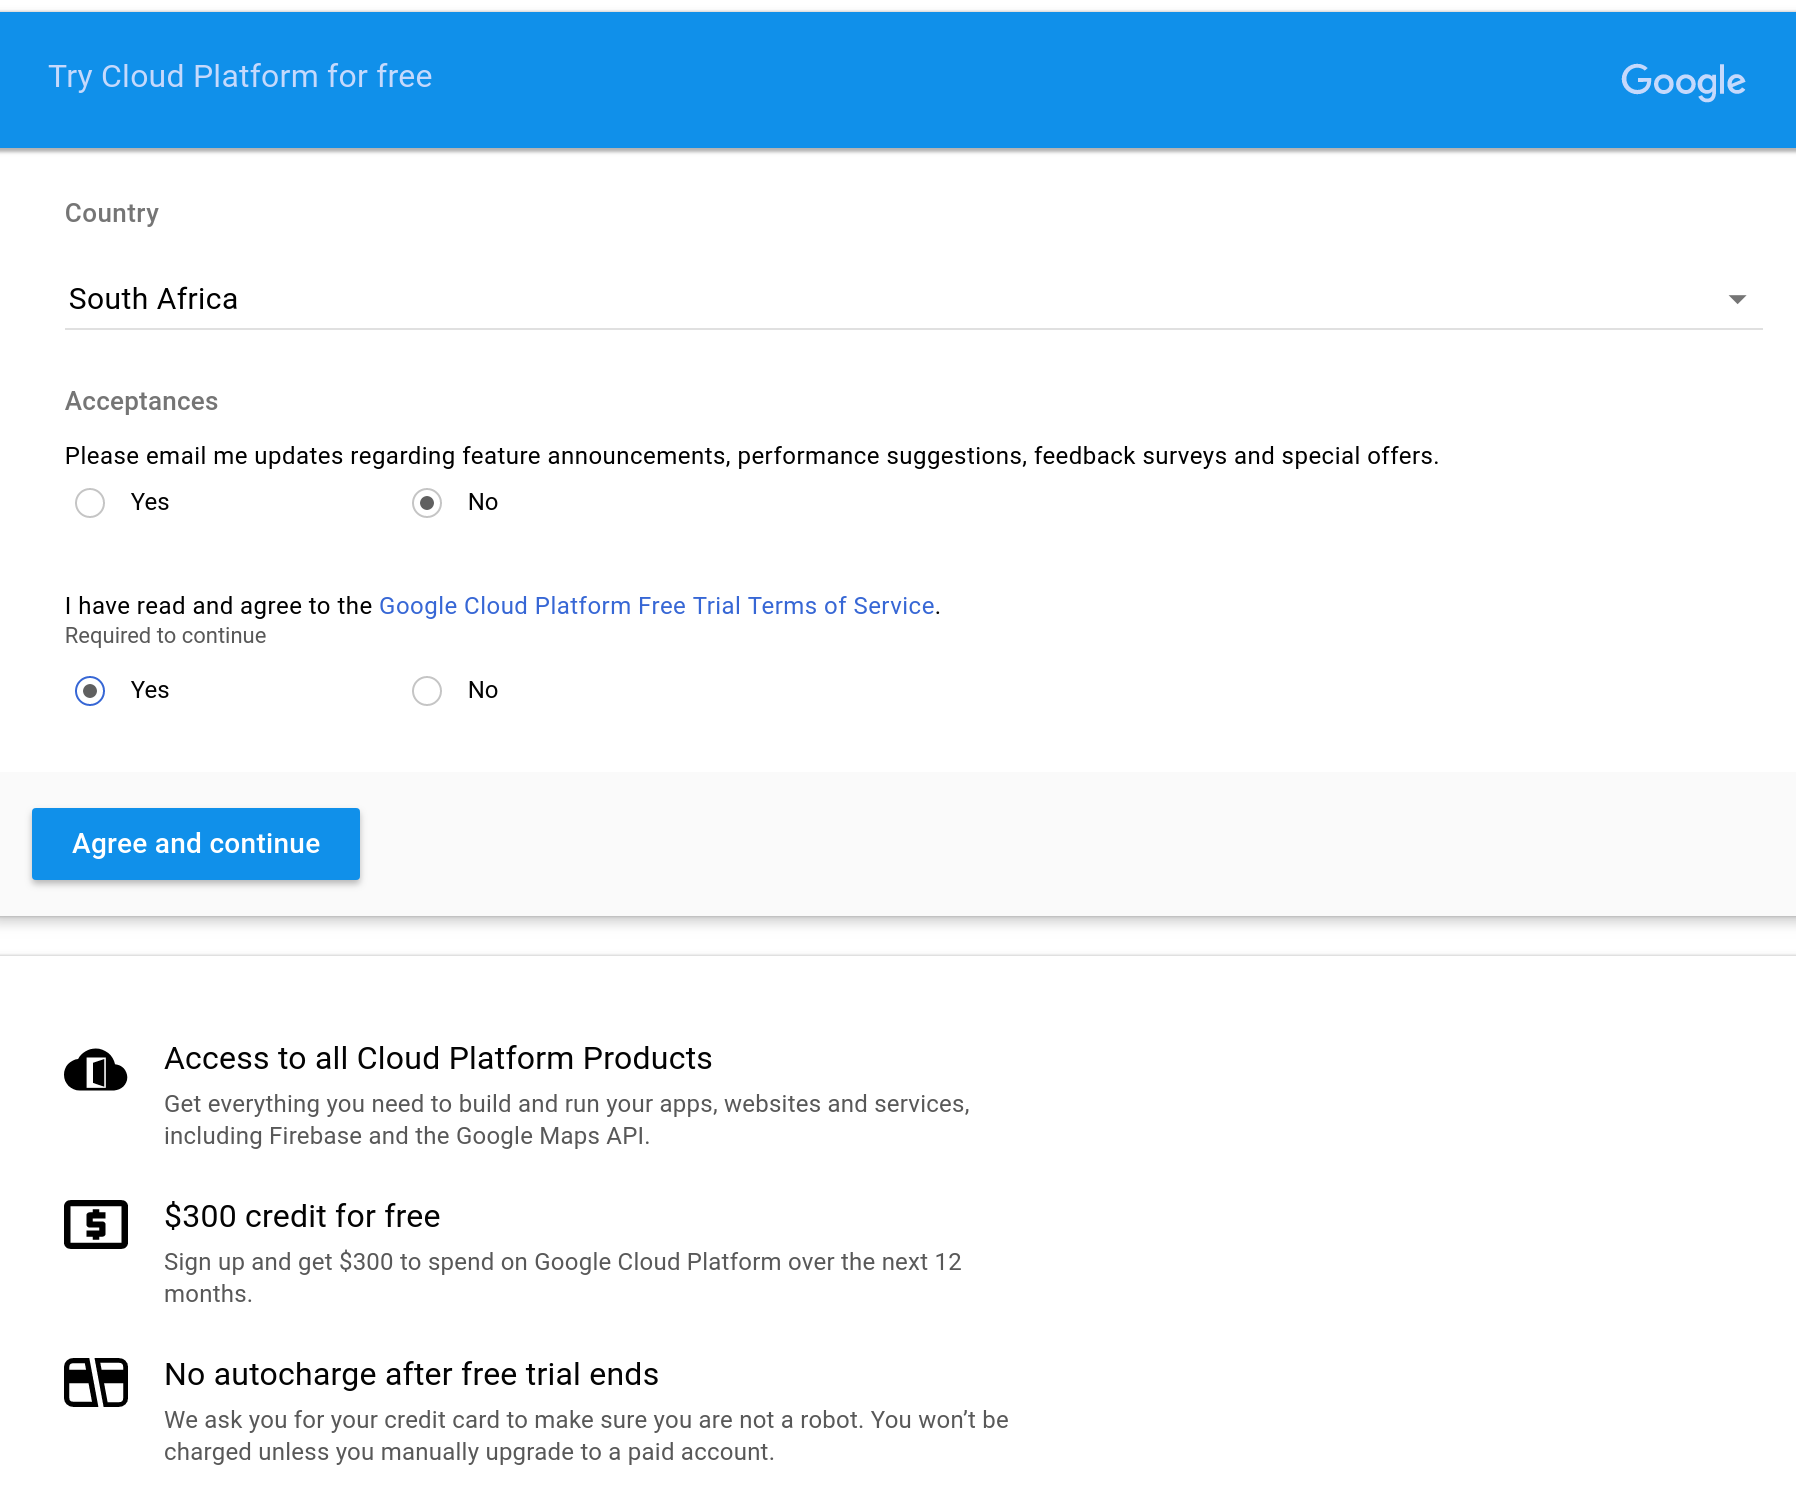</div>
<div style="text-align:center;">**Accept the terms and conditions**</div>

* ### Fill in your name and address details
<div style="display:block;margin:auto;width:800px;">
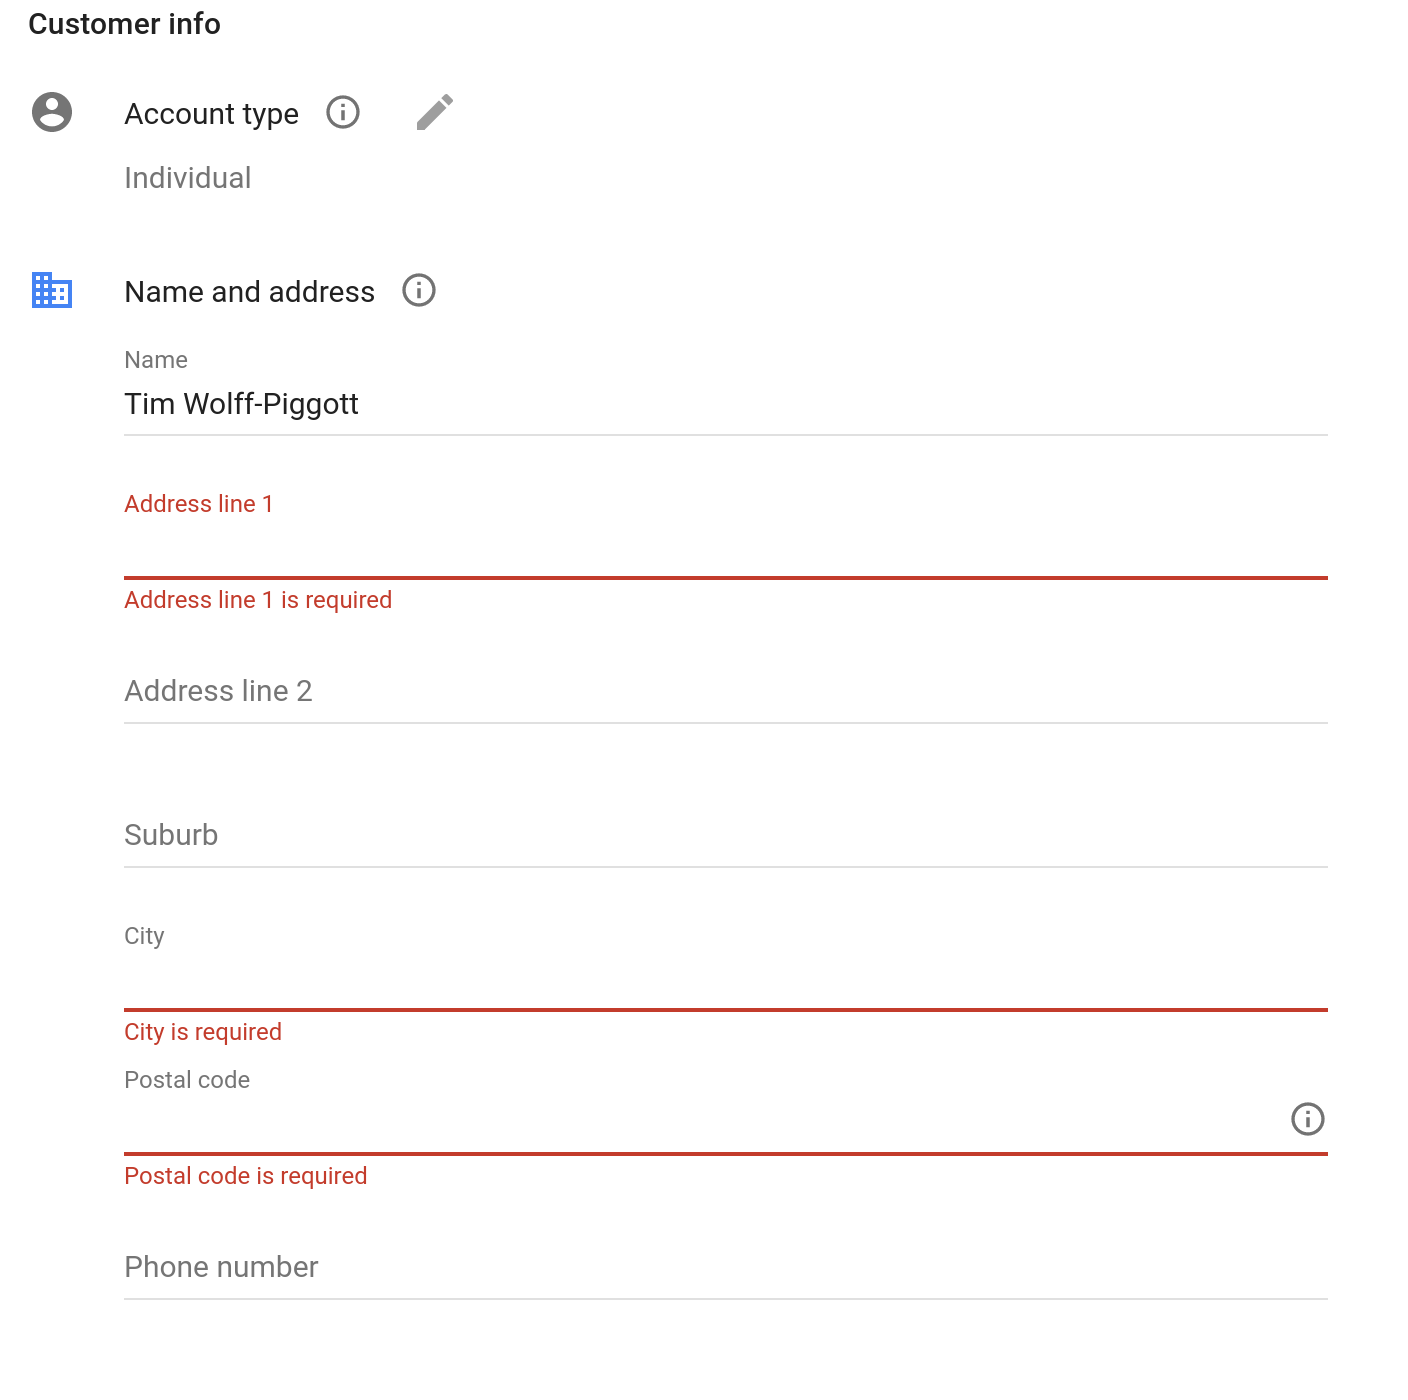
</div>
<div style="text-align:center;">**Fill in your name and address**</div>

* ### Fill in your card details
(there is no automatic billing; after your free trial expires you have to manually upgrade your account before you can be liable for any charges)
<div style="display:block;margin:auto;width:800px;">
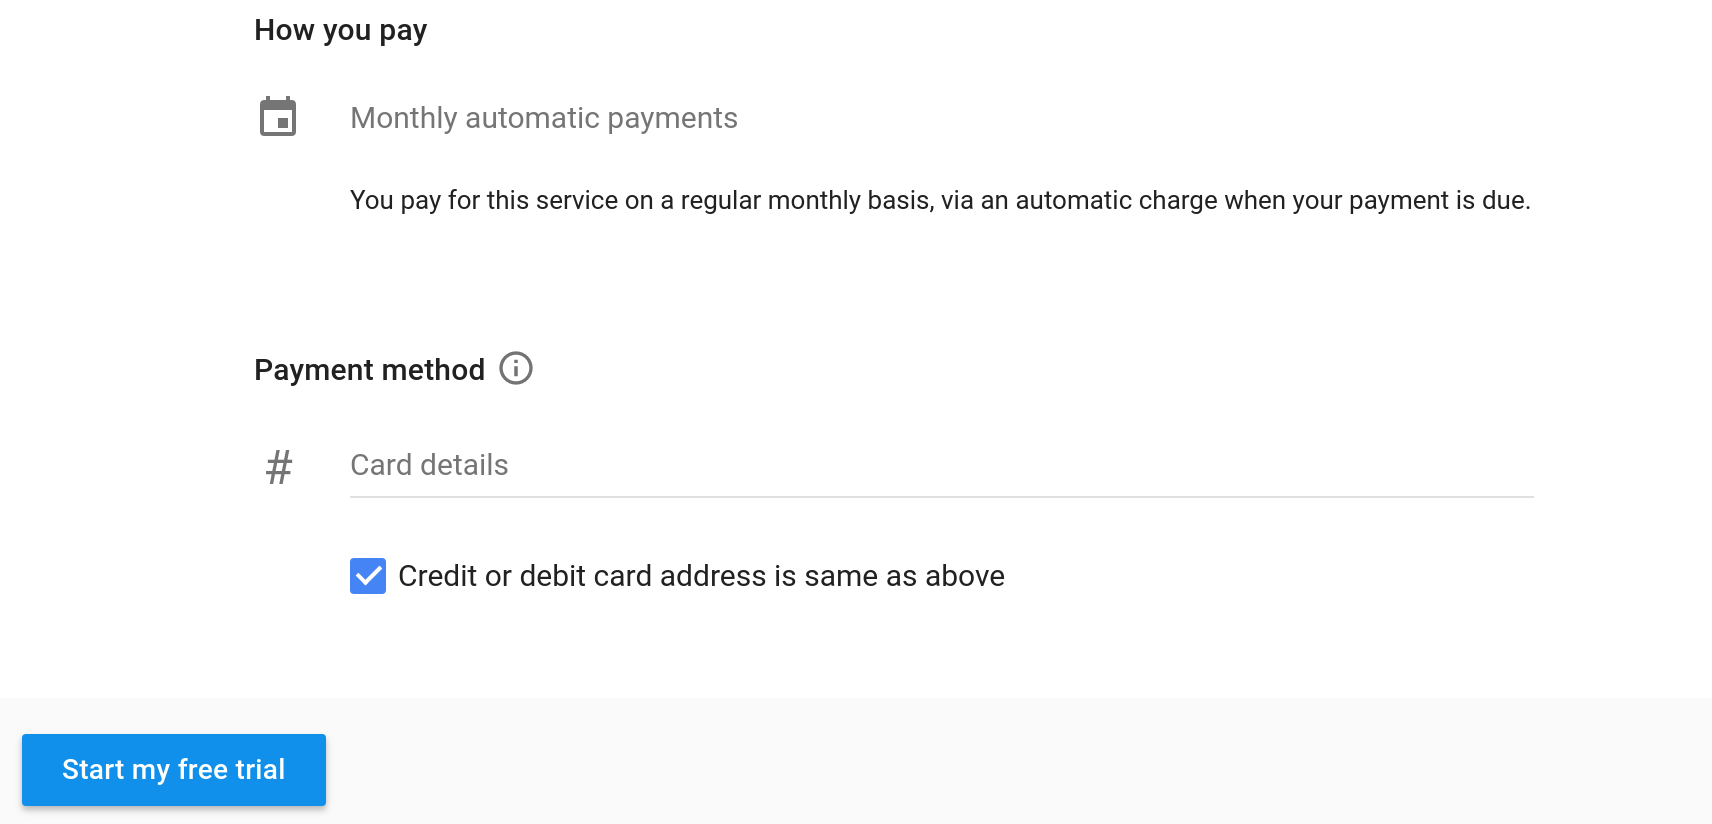
</div>
<div style="text-align:center;">**Fill in your card details**</div>

* ### Your account should now be active, and we can create a project
<div style="display:block;margin:auto;width:800px;">
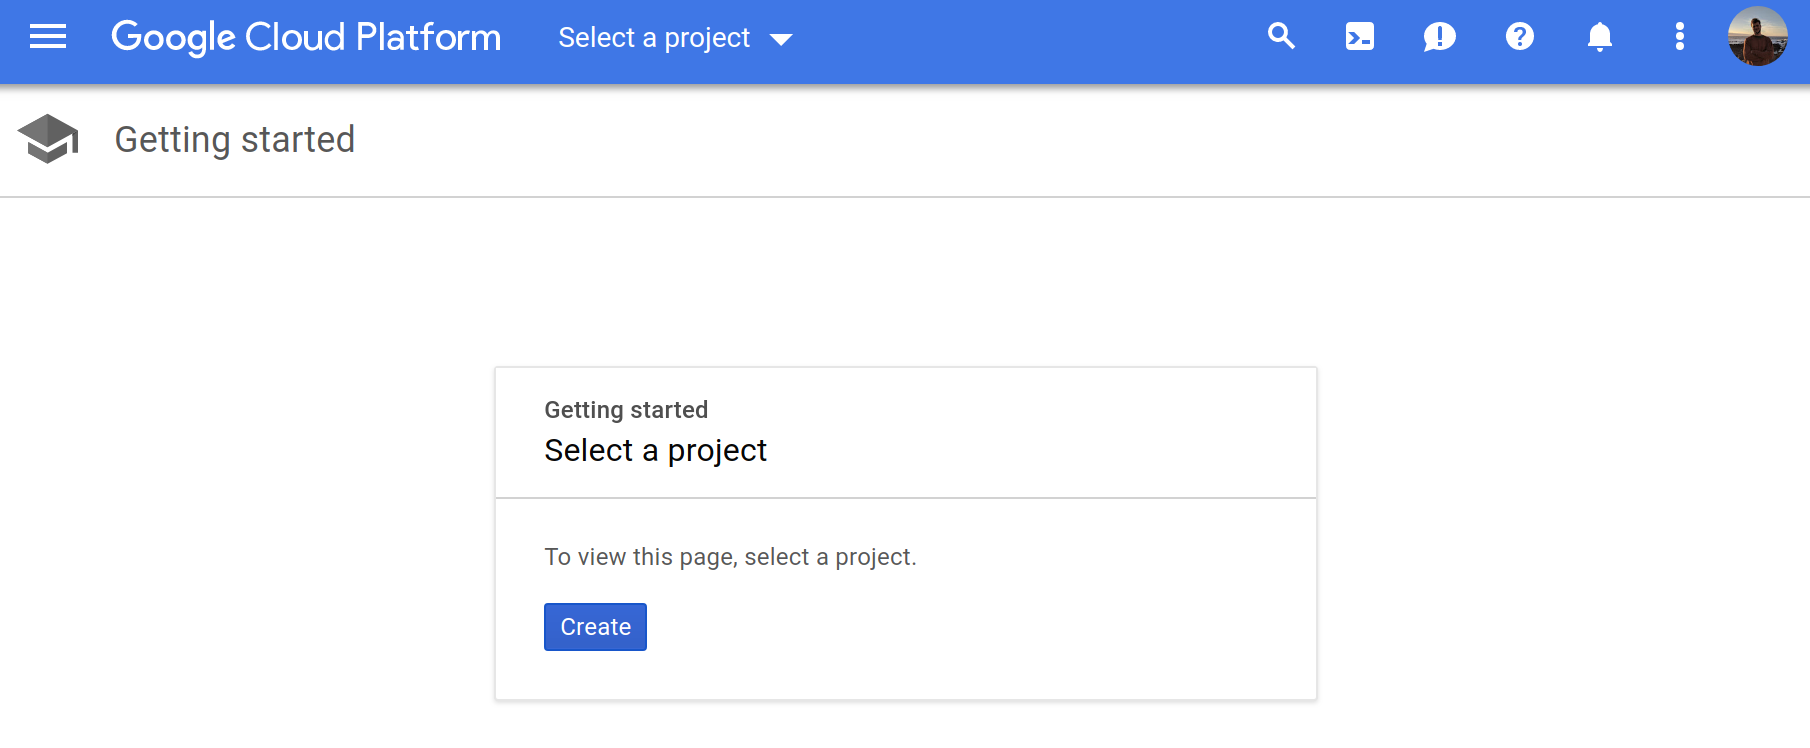
</div>
<div style="text-align:center;">**Create a project**</div>

* ### I'll name it 'pyspark-development', but your choice of name is really up to you.
<div style="display:block;margin:auto;width:800px;">
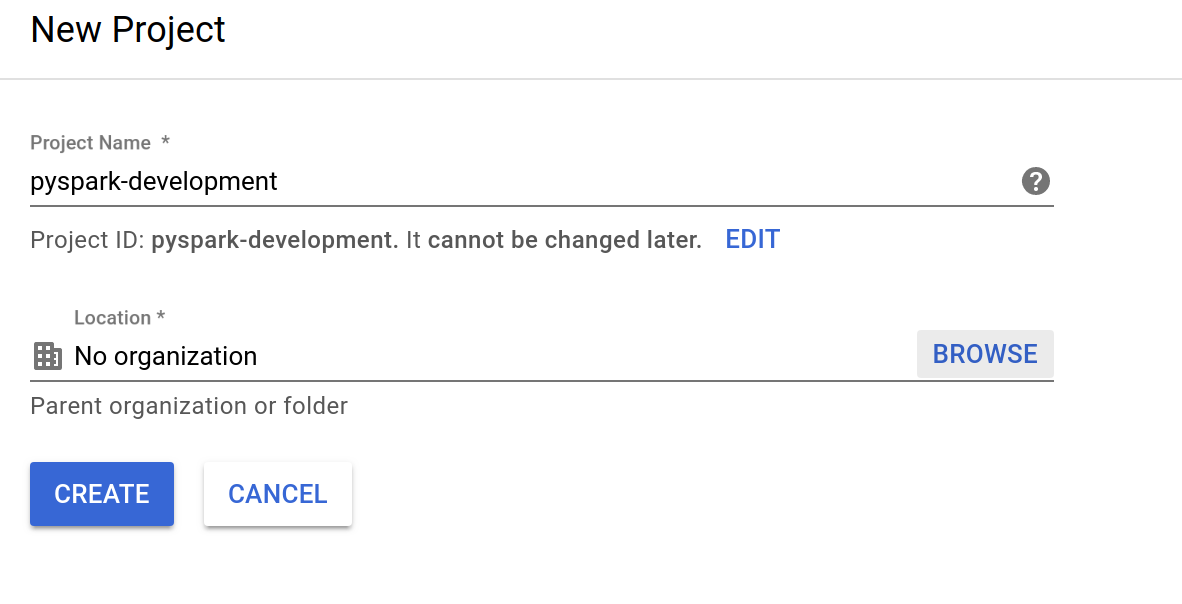
</div>
<div style="text-align:center;">**Name the project**</div>

## Google Cloud Command Line Tools

* ### Install gsutil
``gsutil`` will allow us to access Google cloud storage from the command line on our computers. We simply install the software and authenticate with our newly-created Google Cloud account according to the concise instructions [here](https://cloud.google.com/storage/docs/gsutil_install).

## Working with ``gcloud`` command line tools
Install ``gcloud`` according to the [these instructions](https://cloud.google.com/sdk/docs/downloads-interactive) to be able to work from the command line.
Authenticate your user account in the command line:
```bash
gcloud auth login
```
List credentialed accounts:
```bash
gcloud auth list
```
Set active account:
```bash
gcloud config set account <account>
```
Show current settings:
```bash
gcloud config list
```
Show projects:
```bash
gcloud projects list
```
Set the current project:
```bash
gcloud config set project pyspark-development
```

## Setting up a remote server

1. In the sidebar, navigate to 'Compute Engine'.
2. Click on 'VM instances'.
3. Click 'Create'.
4. We'll create a basic machine for illustration purposes, with minimal memory and storage, 1vCPU, and no GPU.

You can verify that your server is up and running using ``gcloud``:
```bash
gcloud compute instances list
```
You should see something like:
```
NAME           ZONE        MACHINE_TYPE   PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
test-instance  us-east1-b  n1-standard-1               10.142.0.2   35.185.13.2  RUNNING
```


Now we're going to enable OS login to allow us to connect to the server from the command line on our local machines. The following enables the flag across all instances within the current project
```bash
gcloud compute project-info add-metadata --metadata enable-oslogin=TRUE
```

If you don't already have a keypair (check `~/.ssh`), you'll need to generate one:
```bash
ssh-keygen -t rsa -b 4096 -C "your_email@example.com"
```
The above generates a keypair by default in the directory `/home/your_user/.ssh/id_rsa`, optionally with a passphrase.

You can now verify the existence of the private key `id_rsa` and the public key `id_rsa.pub` in the chosen directory:

```bash
tim@dataprophet:~/Github/learning-materials$ ls ~/.ssh
id_rsa  id_rsa.pub  known_hosts
```

You can now add your public key to your Google account:
```bash
gcloud compute os-login ssh-keys add --key-file ~/.ssh/id_rsa.pub
```

My project location was defaulting to Europe, so I set this explicitly:
```bash
gcloud config set compute/zone us-east1-b
```

For now we'll simply connect to the server using ``gcloud``. This will generate another keypair. That's fine:
```ssh
gcloud compute ssh test-instance
```

## Working on the Server
This is a headless server, and all our work will be done in the command line. There is no GUI, as we're probably accustomed to, but a number of tools will make working on the server more effective.

### Resource monitoring
We'll start by installing ``htop``,  a basic system usage monitoring utility:
```bash
sudo apt-get update
sudo apt-get install htop
```
When we're using a GPU, ``nvidia-smi`` also comes in handy.

### Session management and ``tmux``
``tmux`` is a terminal multiplexer, which allows you to split the terminal into multiple panes and windows, and manage separate sessions. Basically, it's important for the following reasons:
1. It's a convenient way to make sure that processes you've started on the server and want to continue running don't get killed when you close your ``ssh`` connection to the server.
2. The pane and windowing functionality allows for natural and rich workspaces.

Let's go ahead and install it:
```bash
sudo apt-get install tmux
```

We'll create a new session using the following command:
```bash
tmux new -s test-session
```
This automatically puts us in the session. We can detach from the session using the key sequence `<control>+b d`.

`tmux ls` lists active sessions, and we can reattach to the session we've created using the command:
```bash
tmux a -t test-session
```

Give the [following](https://hackernoon.com/a-gentle-introduction-to-tmux-8d784c404340) a read, and create a new session with the following layout:

<div style="display:block;margin:auto;width:800px;">
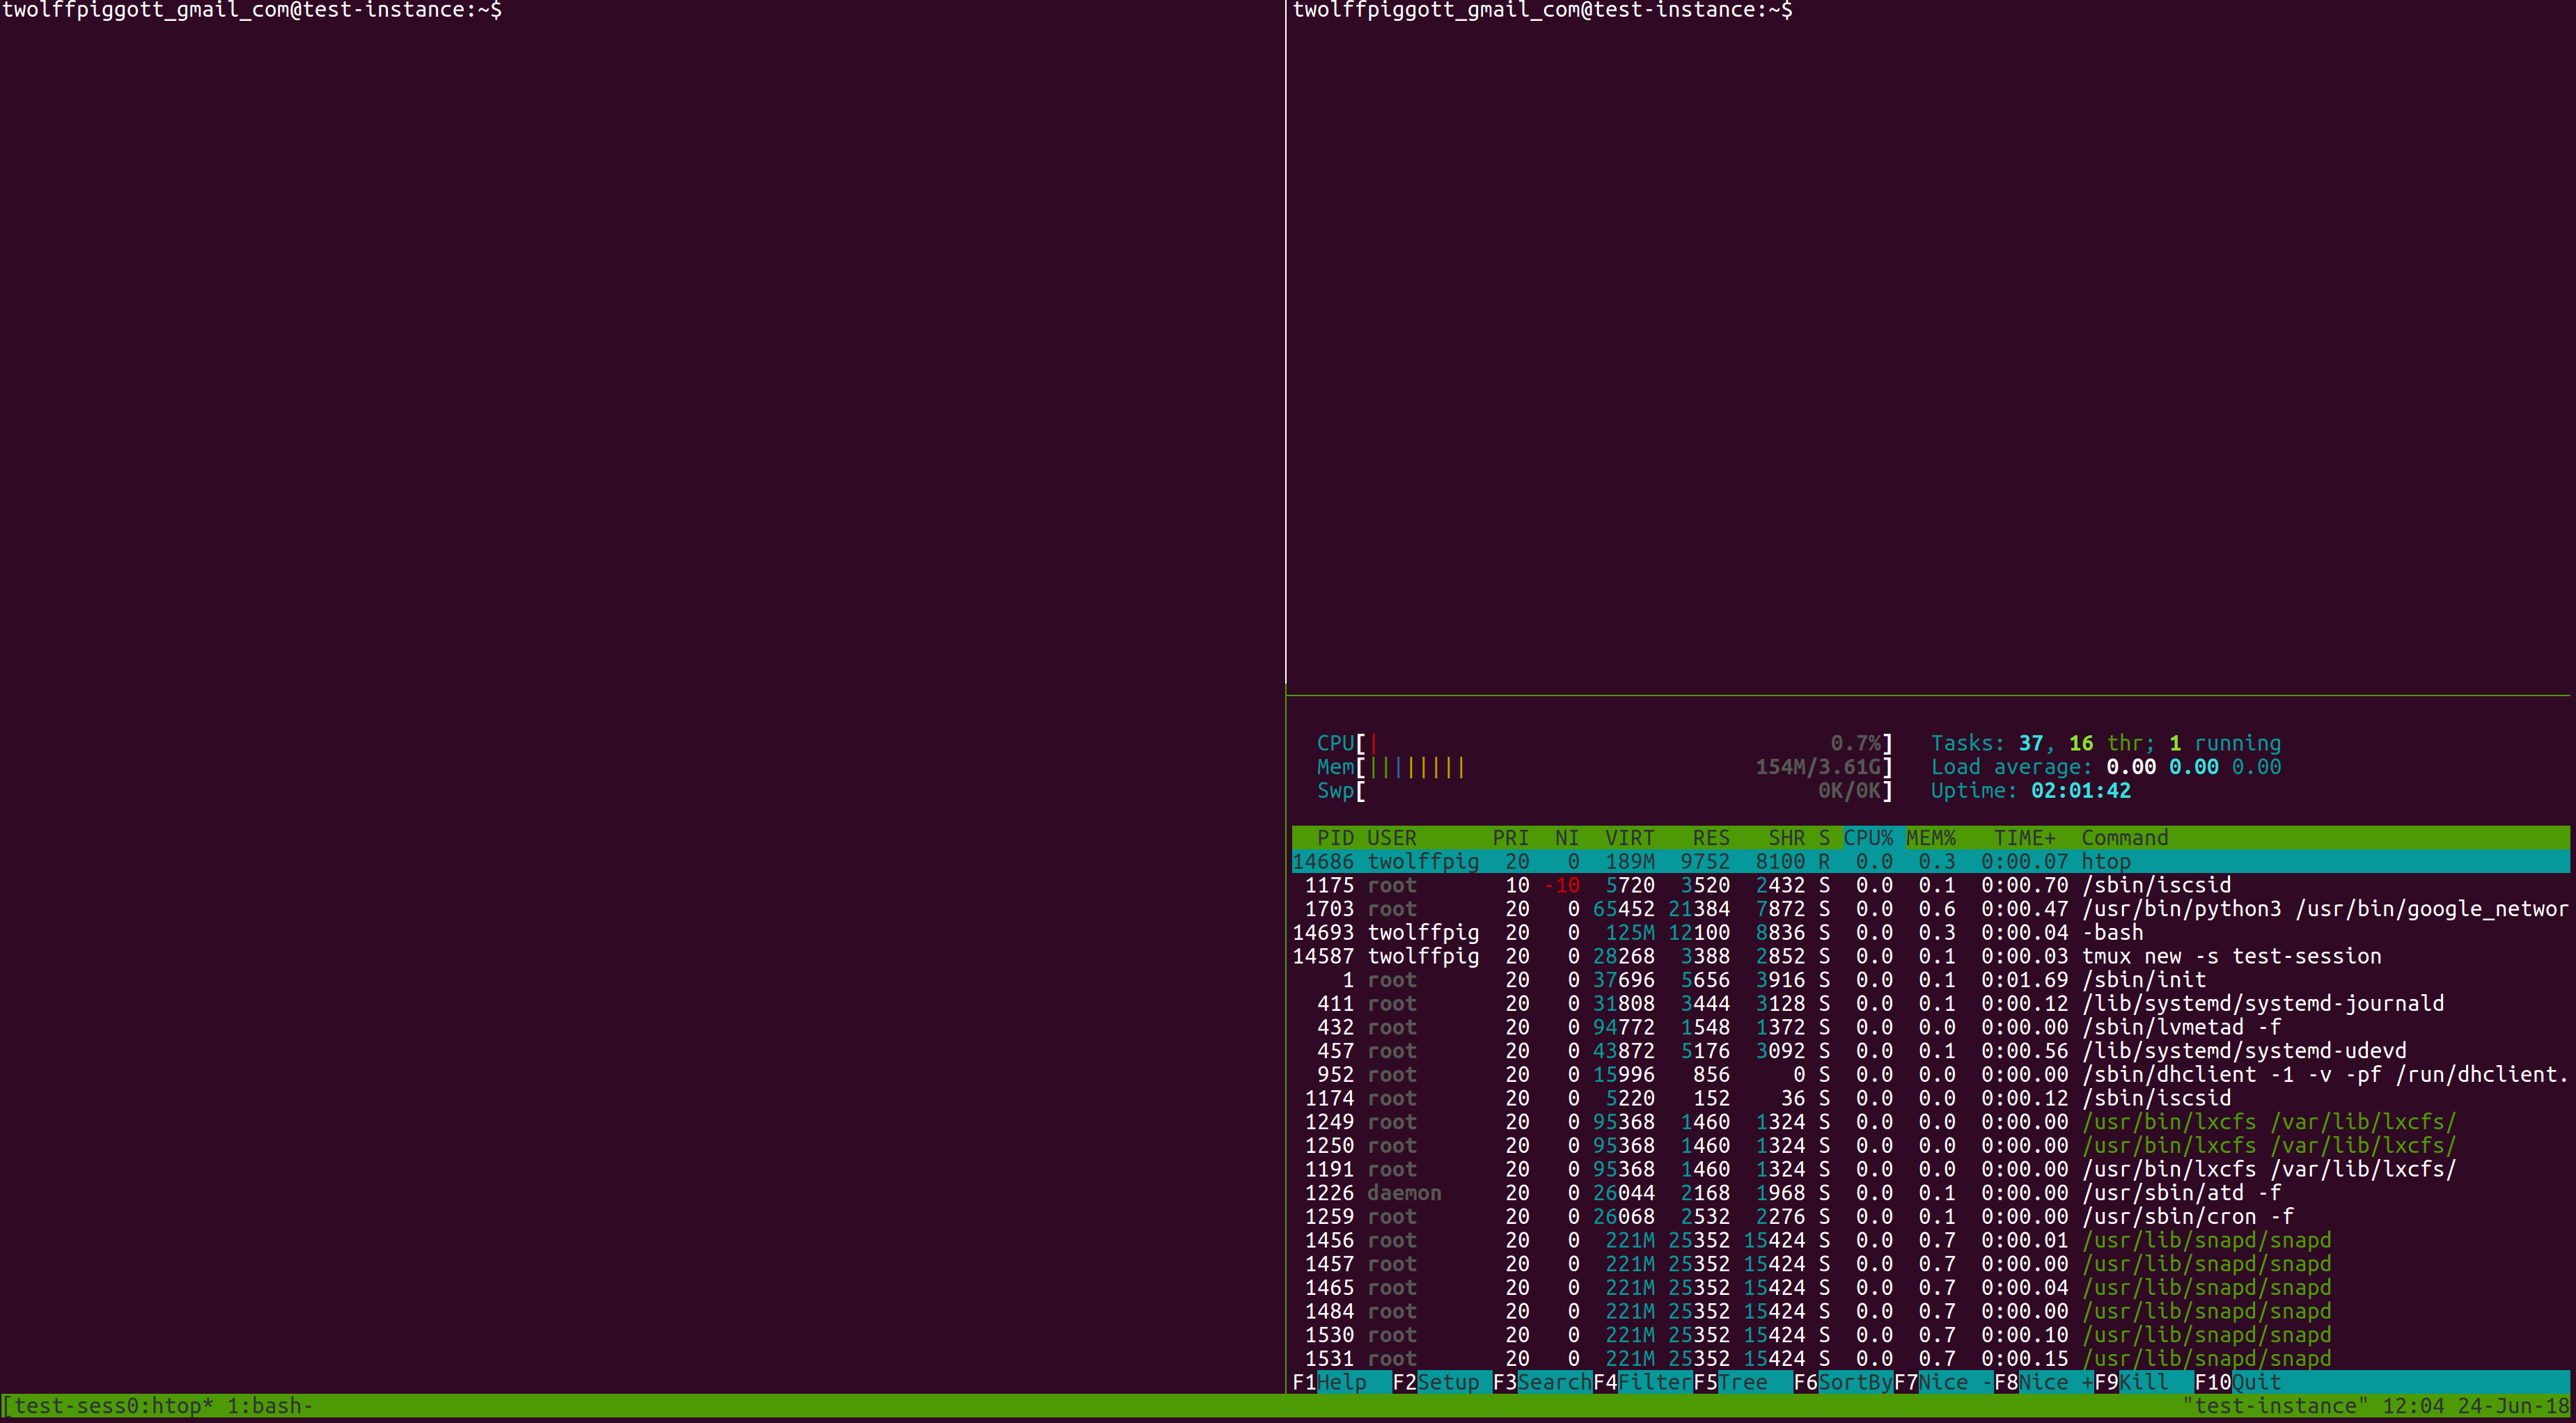
</div>
<div style="text-align:center;">**tmux example layout**</div>

### Editing files and ``vim``

By default, all actions in ``tmux`` are accomplished through keystrokes. But use of the mouse to navigate between panes can be very convenient. We can change this in the config file for tmux.
```
vim ~/.tmux.conf
```
``vim`` is a powerful text editor, but its functionality is likely quite different to text editors you are used to. It has two basic modes you need to be aware of:
1. Command mode (the default mode a file is opened in).
2. Insert mode
Command mode allows to to use predefined key patterns to perform a wide variety of editing tasks. Insert mode is the mode when literal text is being entered. Insert mode can be accessed via typing ``a``, and command mode through ``esc`` (i.e. the escape key). Here we'll enter insert mode and enter the lines:
```
setw -g mouse on
```
We then save by entering command mode and typing ``:wq`` (the shorthand for write and quit). Quit is simply ``:q``, and save alone is ``:w``. We then update ``tmux`` with the new settings:
```
tmux source ~/.tmux.conf
```
Great! We can now click between panes and scroll using our mouse.

**Exercise** You may ultimately decide to use another text editor, but, especially on a remote server, basic knowledge of ``vim`` is very useful, and can make for extremely effective code editing. Type ``vimtutor`` in the command line of your server, and complete lessons 1 through 4.

Now we'll install [SpaceVim](https://spacevim.org/quick-start-guide/), which is a much more customized vim environment. First upgrade to ``vim 8``
```bash
sudo add-apt-repository ppa:jonathonf/vimq
sudo apt update
sudo apt install vim
```
Then run the install script for SpaceVim:
```bash
curl -sLf https://spacevim.org/install.sh | bash
```

**Don't forget to stop or delete your instance when you've finished working with it in the Google Cloud console**